In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def get_data(population): 
    over_ff_percentage = .17
    under_ff_percentage = .83

    over_ff = math.ceil(population * over_ff_percentage)
    under_ff = population - over_ff

    # For self-reference
    key = ["commute", "local", "recreation", "other"]
    trip_key = ["car", "public", "new", "other"]

    # 10,5,5,2

    # Transition probability arrays
    health_cost = [3.6,1.8,1.8,0.72]

    commute = [37.26, 32.38, 0.89, 29.47]
    local = [47.04,29.43,6.04,17.49]
    recreation = [9.45,19.36,47.98,23.21]
    other = [9.89,8.79,16.48,64.84]

    under = [58,9,21,12]
    over = [30,31,29,10]

    for arr in [commute, local, recreation, other, under, over]:
        for i in range(len(arr)):
            arr[i] /= 100

    # Times two for there and back
    car = 348 * 2
    bus = 299 * 2
    ebike = 8 * 2
    bike = 8 * 2

    translate = [car, bus, ebike, bike]

    def act(age) :
        # 1 is over 55
        if age == 1 :
            return np.random.choice(4,p=over)
        # 0 is under 55
        if age == 0 :
            return np.random.choice(4,p=under)
        
    class Person:
        def __init__(self, age, activity):
            self.activity = activity
            self.age = age
            self.start_cost = 145000
            self.cost = 0

            self.health_cost = health_cost[self.activity]

        def change(self):
            t = 0
            
            # commute
            if self.activity == 0 :
                new_transport = np.random.choice(4,p=commute)
                t = translate[new_transport]
            
            if self.activity == 1:
                new_transport = np.random.choice(4,p=local)
                t = translate[new_transport]

            if self.activity == 2:
                new_transport = np.random.choice(4,p=recreation)
                t = translate[new_transport]

            if self.activity == 3:
                new_transport = np.random.choice(4,p=other)
                t = translate[new_transport]

            self.cost -= (t * 1825)

        def get_cost(self):
            return self.cost + self.start_cost

    saving_sum_arr = []
    health_sum_arr = []

    iteration = range(1)

    for i in iteration :
        # Create population

        population = []

        for i in range (over_ff) :
            population.append(Person(1, act(1)))
                
        for i in range (under_ff) :
            population.append(Person(0, act(0)))

        saving_sum = 0
        health_sum = 0
            
        for person in population :
            person.change()
            saving_sum += person.get_cost()
            health_sum += person.health_cost

        saving_sum_arr.append(saving_sum)
        health_sum_arr.append(health_sum)

    return np.array(saving_sum_arr).mean() * -1, np.array(health_sum_arr).mean() * 1

In [8]:
year_production_us = [70,159,193,130,152,220,369,423,416,750,928]
year_production_uk = [20,25,50,40,75,55,70,101,160,160,170]
year = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

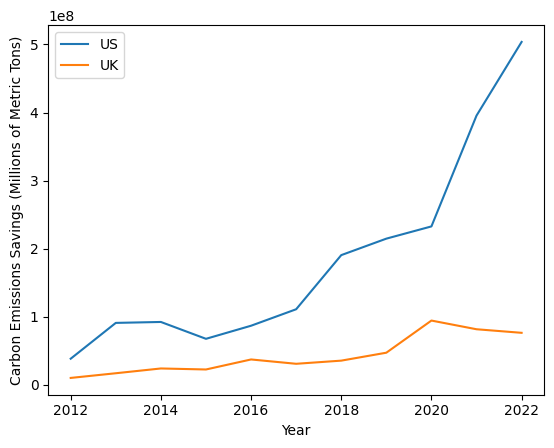

In [9]:
carbon_us = []
carbon_uk = []

for yr in year_production_us:
    carbon_us.append(get_data(yr)[0])

for yr in year_production_uk:
    carbon_uk.append(get_data(yr)[0])

plt.plot(year, carbon_us, label="US")
plt.plot(year, carbon_uk, label="UK")
plt.xlabel("Year")
plt.ylabel("Carbon Emissions Savings (Millions of Metric Tons)")
plt.legend()

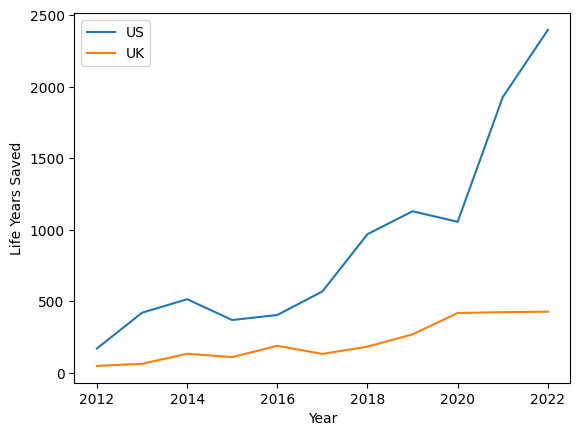

In [10]:
years_us = []
years_uk = []

for yr in year_production_us:
    years_us.append(get_data(yr)[1])

for yr in year_production_uk:
    years_uk.append(get_data(yr)[1])

plt.plot(year, years_us, label="US")
plt.plot(year, years_uk, label="UK")
plt.xlabel("Year")
plt.ylabel("Life Years Saved")
plt.legend()

In [ ]:
# Inputs

uk_tf = 322824 // 10000
uk_te = 563780 // 10000

# us
us_tf = 1907964 // 10000
us_te = 3796118 // 10000

